# Классификация текста

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем решать задачу предсказания оценки, проставленной вину, базируясь на отзыве. Данные взяты из конкурса https://www.kaggle.com/zynicide/wine-reviews

In [2]:
data = pd.read_csv('winemag.csv', index_col=0, na_filter=False)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


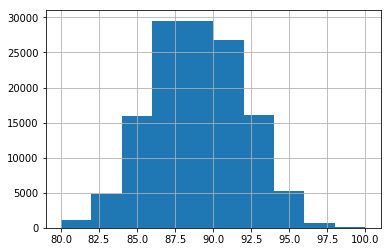

In [3]:
data['points'].hist()

Бинаризуем таргет: будем предсказывать, превысит ли оценка 90.

In [4]:
data['>=90'] = data['points'] >= 90
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,>=90
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,,Sicily & Sardinia,Etna,,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,,,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False
2,US,"Tart and snappy, the flavors of lime flesh and...",,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,,Alexander Peartree,,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False


Из всего многообразия признаков нас будет интересовать **description** -- признак содержащий описание вина и **points** -- присужденный балл

#### Задание 1
Выделите из данных X и y

In [5]:
X = data['description']
y = data['>=90']

## Извлечение признаков из текстов

Перед тем как работать с текстом, его необходимо токенизировать - разбить на отдельные токены. В качестве токенов могут выступать слова, фразы, предложений и т.п. Токенизировать текст можно  помощью регулярных выражений или готовых токенизаторов. 

После токенизации нужно привести текст к нормальной форме. Речь идет о [стемминге и/или лемматизации](https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html) - это схожие процессы, используемые для обработки словоформ.

Для работы лемматизации английского текста можно воспользоваться библиотекой nltk:

In [6]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/yury/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yury/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Задание 2
Токенизируйте тексты. Сейчас Х - это набор из строк-текстов. Разбейте каждый текст на слова (токенизируйте его), каждое из которых написано в нижнем регистре.

(Вам могут понадобиться функция word_tokenize из nltk.tokenize, а также методы строк isalpha и lower)

In [7]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm_notebook

# [for x in tqdm_notebook(X)]

# ВАШ КОД ЗДЕСЬ

tokens = [list(filter(str.isalpha, word_tokenize(text.lower()))) for text in tqdm_notebook(X)]

In [8]:
tokens[0]

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'and',
 'dried',
 'herb',
 'the',
 'palate',
 'is',
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'and',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity']

#### Задание 3
Теперь, когда для каждого текста у вас есть набор слов, встречающихся в нем, можно переходить к лемматизации.
Лемматизируйте все слова с помощью WordNetLemmatizer и объедините получившиеся слова в одну строку через пробел, запишите результат в X

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
#lemmatizer.lemmatize(<word>)

# ВАШ КОД ЗДЕСЬ


X = [' '.join([lemmatizer.lemmatize(word) for word in array]) for array in tqdm_notebook(tokens)]

In [ ]:
X[0]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], test_size=0.1)

In [12]:
y_train = y_train.values
y_test = y_test.values

### Bag of Words

Cоздаем вектор длиной в словарь, для каждого слова считаем количество вхождений в текст и подставляем это число на соответствующую позицию в векторе.

Построим модель BOW с помощью [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

Размер словаря: 26506
Top-10 слов: and; the; of; with; this; it; is; wine; flavor; in


Видно, что большая часть из топ-10 слов является не информативными - стоп-словами. Что бы они не участвовали в представлении, в конструктор CountVectorizer в качестве параметра можно передать список стоп-слов:

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/yury/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words=stop_words)
vectorizer.fit(X_train)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d' % len(vocabulary))

description_count = vectorizer.transform(X_train)
top_tokens, _ = zip(*sorted(zip(vocabulary, description_count.sum(axis=0).getA1()), 
                            key=lambda x: x[1], reverse=True)[:10])
print('Top-10 слов: %s'%'; '.join(top_tokens))

Размер словаря: 26383
Top-10 слов: wine; flavor; fruit; aroma; finish; palate; acidity; tannin; cherry; drink


Чтобы сжать векторное представление, можно "отбросить" редкие слова:

In [16]:
vectorizer = CountVectorizer(stop_words=stop_words, min_df=10).fit(X)
vocabulary = vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

X_train_bow = vectorizer.transform(X_train)
X_test_bow = vectorizer.transform(X_test)

Размер словаря: 7669


### Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)
y_pred = nb_model.predict_proba(X_test_bow)[:, 1]

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve

0.8723291375759809


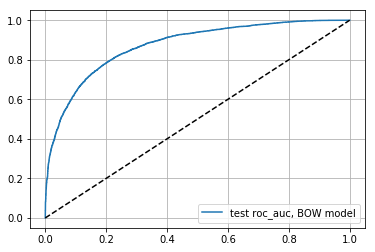

In [20]:
plt.plot(*roc_curve(y_test, y_pred)[:2], label='test roc_auc, BOW model')

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.grid()
plt.legend()

print(roc_auc_score(y_test, y_pred))

In [21]:
def plot_models(names, models, X_train, X_test, y_train, y_test):
    """
    gets lists of names, models, lists of train and test samples, train and test answers
    plots ROC curves
    """
    
    for name, model, X in zip(names, models, X_train):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_train, proba)
        plt.plot(*roc_curve(y_train, proba)[:2], label='train %s AUC=%.4f' % (name, auc))
    
    for name, model, X in zip(names, models, X_test):
        proba = model.predict_proba(X)[:, 1]
        auc = roc_auc_score(y_test, proba)
        plt.plot(*roc_curve(y_test, proba)[:2], label='test %s AUC=%.4f' % (name, auc))
        
        
    plt.plot([0, 1], [0, 1], '--', color='black',)
    plt.legend(fontsize='large')
    plt.grid()
    plt.show()

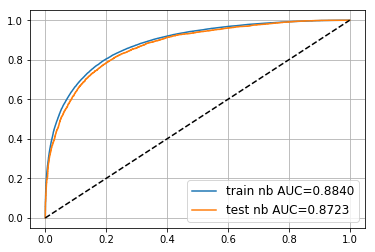

In [22]:
plot_models(['nb'], [nb_model], [X_train_bow], [X_test_bow], y_train, y_test)

### Логистическая регрессия: сравним качество

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logistic_model = LogisticRegression()

logistic_model.fit(X_train_bow, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

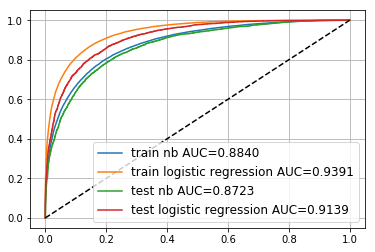

In [25]:
plot_models(['nb', 'logistic regression'], [nb_model, logistic_model], 
            [X_train_bow] * 2, [X_test_bow] * 2, 
            y_train, y_test)

### Добавление tf-idf фичей

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
tf_idf_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=10).fit(X)
vocabulary = tf_idf_vectorizer.get_feature_names()
print('Размер словаря: %d'%len(vocabulary))

X_train_tf_idf = tf_idf_vectorizer.transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

Размер словаря: 7669


In [28]:
tf_idf_logistic_model = LogisticRegression()

tf_idf_logistic_model.fit(X_train_tf_idf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

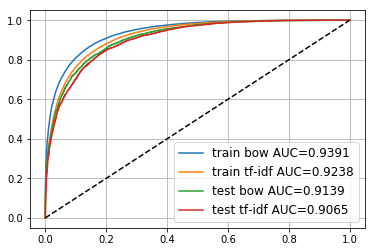

In [29]:
plot_models(['bow', 'tf-idf'], [logistic_model, tf_idf_logistic_model], 
            [X_train_bow, X_train_tf_idf], [X_test_bow, X_test_tf_idf] * 2, 
            y_train, y_test)

### Кодирование предложений эмбеддингами слов

In [32]:
import gensim.downloader 
embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

In [31]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.wv.vectors.shape[1]
    
    comment_vectors = np.stack([embeddings.wv.word_vec(word) if word in embeddings.wv.vocab 
                                else np.zeros(embeddings.wv.vectors.shape[1])
                       for word in comment.split()])
    
    features = np.sum(comment_vectors, axis=0)
    return features

In [34]:
X_train_wv = np.stack([vectorize_sum(text) for text in X_train])
X_test_wv = np.stack([vectorize_sum(text) for text in X_test])

/home/yury/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/home/yury/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':


In [35]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

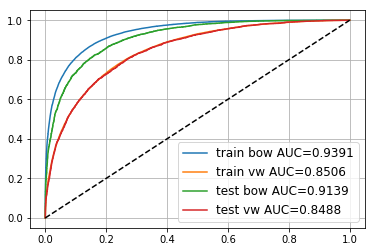

In [36]:
plot_models(['bow', 'vw'], [logistic_model, wv_model], 
            [X_train_bow, X_train_wv], [X_test_bow, X_test_wv] * 2, 
            y_train, y_test)